In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os, glob, numpy as np, csv, math
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from scipy import signal, fftpack
#from matplotlib.legend_handler import HandlerLine2D
from matplotlib.lines import Line2D



dir_path = os.path.dirname(os.path.realpath('plotter_notebook.ipynb'))
wrkdir = os.path.join(dir_path,'data')
csv_files = os.path.join(wrkdir,'*.csv')
meta_files = os.path.join(wrkdir,'*.txt')
trackdata = glob.glob(csv_files)
metadata = glob.glob(meta_files)
n_files = np.size(trackdata)

location = 'average'
volumes = [0.5,1.0,2.0,5.0,10.0]
angles= [2.0,3.5,5.0]

def get_variables(metadata):
    f = open(metadata[0],"r")
    drop_vars = list(csv.reader(f))
    f.close()
    
    
    drop_meta = {}
    for i in range(n_files):
        drop_meta[drop_vars[i+1][0]] = {}
        n_meta = np.size(drop_vars[0][1:])
        for n in range(n_meta):
            drop_meta[drop_vars[i+1][0]][drop_vars[0][n+1].split('_')[0]] = float(drop_vars[i+1][n+1])

    meta = drop_meta
    return meta

meta = get_variables(metadata)

def get_data(wrkdir,csv_files,trackdata,n_files):
    
    total_drop_data = {}
    
    
    for i in range(n_files):
        (location, name) = os.path.split( trackdata[i] )
        
        f = open(trackdata[i],"r")
        drop_data = list(csv.reader(f))
        f.close()
        
        col_names = drop_data[0]
        n_col = np.size(drop_data[0])
        drop_data = np.asarray(drop_data[1:],dtype=float)
        total_drop_data[name[:-4]] = {}
        for j in range(n_col):
            total_drop_data[name[:-4]][col_names[j]] = drop_data[:,j]

    return total_drop_data

data = get_data(wrkdir,csv_files,trackdata,n_files)

def basic_plot_format(subplot_label,x_label,y_label,major_grid,minor_grid,legend):
    # General plot formatting for relatively good plots. adjustments may be necessary
    # sub_plot_label, usually defined by 'ax' and a number
    # x_label and y_label must be type 'str'... Can use LaTeX for typsetting
    # major_grid, minor_grid, and legend are boolean
    
    plt.style.use('classic')
    font = {'family' : 'Times New Roman',
            'weight' : 0,
            'size'   : 12}
    plt.rc('font',**font)
    plt.set_cmap('cool')
    subplot_label.spines['right'].set_color('none')
    subplot_label.spines['top'].set_color('none')
    subplot_label.yaxis.set_ticks_position('left')
    subplot_label.xaxis.set_ticks_position('bottom')
    subplot_label.minorticks_on()
    subplot_label.set_xlabel(x_label,fontsize=18)
    subplot_label.set_ylabel(y_label,fontsize=18)

    subplot_label.grid(b=major_grid,which='major')
    subplot_label.grid(b=minor_grid,which='minor')
    
    if legend == False:
         0   
    else:
        legend =  subplot_label.legend(numpoints = 1,bbox_to_anchor=(1, 1),loc='upper left',frameon=False,fontsize=8)
        legend.get_frame().set_facecolor('white')
        return legend

# Location

In [1]:
def plot_xlocation(meta,data,nfiles,location,volumes,angles):
    conf_parameter = {}
    vel_data = {}
    for key in sorted(data):
        
        xi = data[key][location][0]/1000                                             # m
        V = meta[key]['Volume']*(10**(-6))                                           # m^3
        alpha = (meta[key]['Angle']/2.)*(math.pi/180.)                               # rad
        conf_parameter[key] = xi*((4*math.pi)/(3*V))**(1/3.)*math.sin(alpha)
        
        
        
        
        
        
        
        
    angle1p2 = [key for key in sorted(meta, key = lambda x: meta[x]['IL']) if meta[key]['Angle']==1.2]
    angle2p0 = [key for key in sorted(meta, key = lambda x: meta[x]['IL']) if meta[key]['Angle']==2.0]
    angle3p5 = [key for key in sorted(meta, key = lambda x: meta[x]['IL']) if meta[key]['Angle']==3.5]
    angle4p0 = [key for key in sorted(meta, key = lambda x: meta[x]['IL']) if meta[key]['Angle']==4.0]
    angle5p0 = [key for key in sorted(meta, key = lambda x: meta[x]['IL']) if meta[key]['Angle']==5.0]
    angle7p7 = [key for key in sorted(meta, key = lambda x: meta[x]['IL']) if meta[key]['Angle']==7.7]
    
    fig = plt.figure(facecolor="white")
    fig.set_figheight(15)
    colormap = plt.get_cmap('jet')
    n1= np.size(angle2p0)
    cNorm1  = colors.Normalize(vmin=0, vmax=n1-1)
    scalarMap1 = cmx.ScalarMappable(norm=cNorm1, cmap=colormap)
    for counter,element in enumerate(angle2p0):
        t = data[element]['time']
        dat_ave = data[element]['average']

        dropno = element+' '
        vol = str(meta[element]['Volume'])
        angl = str(meta[element]['Angle'])
        IL = str( data[element][location][0])
        colorVal = scalarMap1.to_rgba(counter)
        ax = fig.add_subplot(6,1,1)
        legend_label = dropno+vol+'ml '+IL+'mm '
        ax.plot(t,dat_ave,'.',color=colorVal,label = legend_label,fillstyle='none',markeredgewidth=1.5,ms=8)
        ax.set_xlim([0,2.1])
        legend1 = basic_plot_format(subplot_label = ax, x_label = '$t$ (s)', y_label = '$U$ (mm/s)',\
                                   major_grid = True, minor_grid = 0, legend = True\
                                  )
    n2= np.size(angle3p5)
    cNorm2  = colors.Normalize(vmin=0, vmax=n2-1)
    scalarMap2 = cmx.ScalarMappable(norm=cNorm2, cmap=colormap)

    for counter,element in enumerate(angle3p5):
        t = data[element]['time']
        dat_ave = data[element]['average']

        dropno = element+' '
        vol = str(meta[element]['Volume'])
        angl = str(meta[element]['Angle'])
        IL = str( data[element][location][0])
        colorVal = scalarMap2.to_rgba(counter)
        ax = fig.add_subplot(6,1,2)
        legend_label = dropno+vol+'ml '+IL+'mm '
        ax.plot(t,dat_ave,'.',color=colorVal,label = legend_label,fillstyle='none',markeredgewidth=1.5,ms=8)
        ax.set_xlim([0,2.1])
        legend2 = basic_plot_format(subplot_label = ax, x_label = '$t$ (s)', y_label = '$U$ (mm/s)',\
                                   major_grid = True, minor_grid = 0, legend = True\
                                  )
    n3= np.size(angle5p0)
    cNorm3  = colors.Normalize(vmin=0, vmax=n3-1)
    scalarMap3 = cmx.ScalarMappable(norm=cNorm3, cmap=colormap)
    for counter,element in enumerate(angle5p0):
        t = data[element]['time']
        dat_ave = data[element]['average']

        dropno = element+' '
        vol = str(meta[element]['Volume'])
        angl = str(meta[element]['Angle'])
        IL = str( data[element][location][0])
        colorVal = scalarMap3.to_rgba(counter)
        ax = fig.add_subplot(6,1,3)
        legend_label = dropno+vol+'ml '+IL+'mm '
        ax.plot(t,dat_ave,'.',color=colorVal,fillstyle='none',label = legend_label,markeredgewidth=1.5,ms=8)
        ax.set_xlim([0,2.1])
        legend3 = basic_plot_format(subplot_label = ax, x_label = '$t$ (s)', y_label = '$U$ (mm/s)',\
                                   major_grid = True, minor_grid = False, legend = True\
                                  )
    n4= np.size(angle1p2)
    cNorm4  = colors.Normalize(vmin=0, vmax=n4-1)
    scalarMap4 = cmx.ScalarMappable(norm=cNorm4, cmap=colormap)
    for counter,element in enumerate(angle1p2):
        t = data[element]['time']
        dat_ave = data[element]['average']

        dropno = element+' '
        vol = str(meta[element]['Volume'])
        angl = str(meta[element]['Angle'])
        IL = str( data[element][location][0])
        colorVal = scalarMap1.to_rgba(counter)
        ax = fig.add_subplot(6,1,4)
        legend_label = dropno+vol+'ml '+IL+'mm '
        ax.plot(t,dat_ave,'.',color=colorVal,label = legend_label,fillstyle='none',markeredgewidth=1.5,ms=8)
        ax.set_xlim([0,2.1])
        legend4 = basic_plot_format(subplot_label = ax, x_label = '$t$ (s)', y_label = '$U$ (mm/s)',\
                                   major_grid = True, minor_grid = 0, legend = True\
                                  )
    n5= np.size(angle4p0)
    cNorm5  = colors.Normalize(vmin=0, vmax=n5-1)
    scalarMap5 = cmx.ScalarMappable(norm=cNorm5, cmap=colormap)
    for counter,element in enumerate(angle4p0):
        t = data[element]['time']
        dat_ave = data[element]['average']

        dropno = element+' '
        vol = str(meta[element]['Volume'])
        angl = str(meta[element]['Angle'])
        IL = str( data[element][location][0])
        colorVal = scalarMap1.to_rgba(counter)
        ax = fig.add_subplot(6,1,5)
        legend_label = dropno+vol+'ml '+IL+'mm '
        ax.plot(t,dat_ave,'.',color=colorVal,label = legend_label,fillstyle='none',markeredgewidth=1.5,ms=8)
        ax.set_xlim([0,2.1])
        legend5 = basic_plot_format(subplot_label = ax, x_label = '$t$ (s)', y_label = '$U$ (mm/s)',\
                                   major_grid = True, minor_grid = 0, legend = True\
                                  )
    
    n6= np.size(angle7p7)
    cNorm6  = colors.Normalize(vmin=0, vmax=n6-1)
    scalarMap6 = cmx.ScalarMappable(norm=cNorm6, cmap=colormap)
    for counter,element in enumerate(angle7p7):
        t = data[element]['time']
        dat_ave = data[element]['average']

        dropno = element+' '
        vol = str(meta[element]['Volume'])
        angl = str(meta[element]['Angle'])
        IL = str( data[element][location][0])
        colorVal = scalarMap1.to_rgba(counter)
        ax = fig.add_subplot(6,1,6)
        legend_label = dropno+vol+'ml '+IL+'mm '
        ax.plot(t,dat_ave,'.',color=colorVal,label = legend_label,fillstyle='none',markeredgewidth=1.5,ms=8)
        ax.set_xlim([0,2.1])
        legend6 = basic_plot_format(subplot_label = ax, x_label = '$t$ (s)', y_label = '$U$ (mm/s)',\
                                   major_grid = True, minor_grid = 0, legend = True\
                                  )

    fig.savefig('Figures/position_plots/positions.png',dpi=300,bbox_extra_artists=(legend3,), bbox_inches='tight')


    plt.show()
plot_xlocation(meta,data,n_files,location,volumes,angles)


NameError: name 'meta' is not defined

# Velocity

/home/logan/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


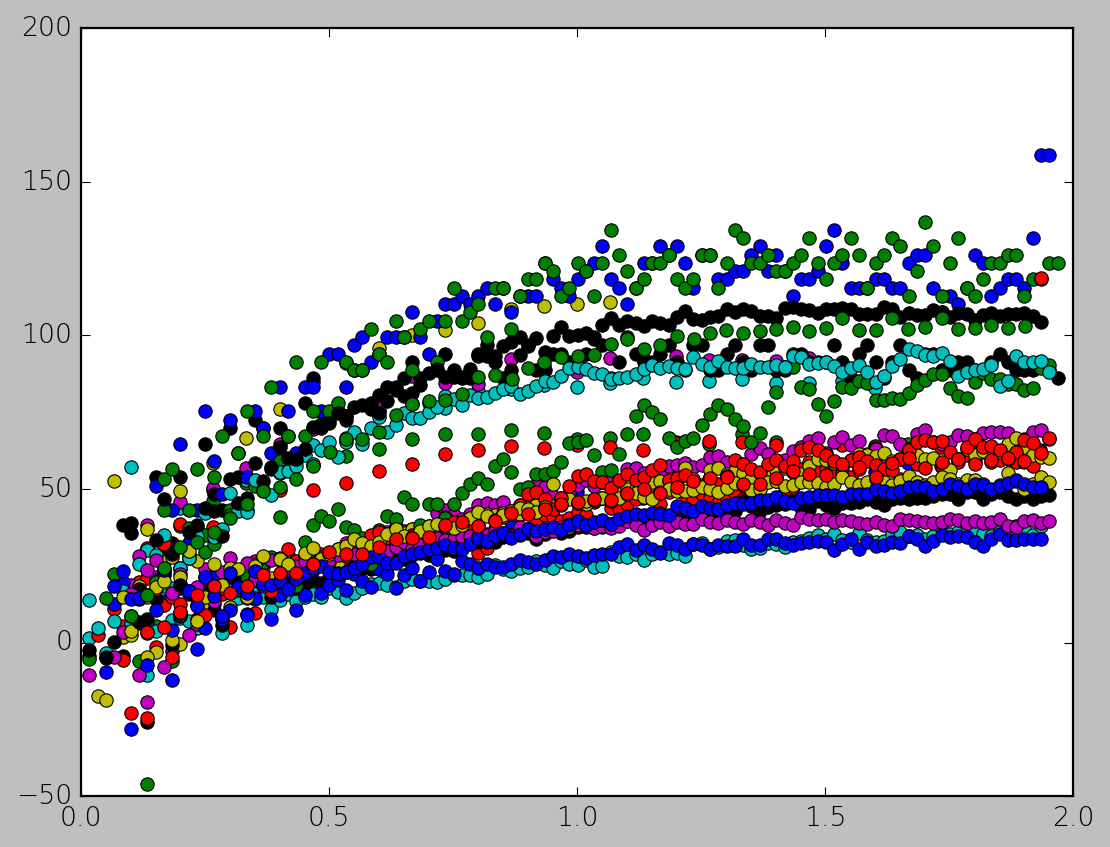

In [17]:
def plot_veldata(meta,data,n_files,location,volumes,angles):
    vel_data  = {}
    for key in sorted(data):
        vel_data[key] = {}
        vel_data[key]['time'] = data[key]['time'][1:-1]
        dxdt_centraldiff = np.zeros(np.size(data[key]['time'])-2)
        for i in range(np.size(data[key]['time'])-2):
            dxdt_centraldiff[i] = (data[key]['average'][i+2]-data[key]['average'][i])/(data[key]['time'][i+2]-data[key]['time'][i])
        vel_data[key]['velocity'] = dxdt_centraldiff
    
    
    
    plt.plot(vel_data[key]['time'],vel_data[key]['velocity'],'o')
        
    plt.show()
plot_veldata(meta,data,n_files,location,volumes,angles)

In [23]:
#angle_counts = {i:meta.count(i) for i in MyList}
[key for key in meta[key]['Angle']]


NameError: name 'key' is not defined